# TP2 MI204 - Classification et Aprentissage

CARVALHO FRULANE DE SOUZA Daniel 

GALVÃO Mateus

TAULOIS BRAGA Bernardo

## Préliminaires informatiques

### Importation des librairies pertinentes

In [3]:
import numpy as np
import cv2
import sys
import os

from matplotlib import pyplot as plt

### Lecture de l'image et récuperation des composantes

Ce code sépare l'image en plusieurs types de composantes :

#### Espace RGB

Ces composantes sont modélisées comme trois vecteurs dont les valeurs répresentent l'intensité des couleurs primaires, c'est-à-dire, rouge, vert et bleu. Ces composantes sont additives, alors il est possible de répresenter presque n'importe quelle couleur avec ces trois valeurs. En revanche, des experiments de "color matching" ont demontré que certaines couleurs ne peuvent pas être exactement réproduites avec une synthèse additive à partir des composantes primaires. Ces composantes ne sont pas invariantes à l'illumination, mais les composantes normalisées sont invariantes colométriques.

#### Espace HSV

Ces composantes essaient de modéliser les couleurs de façon plus proche de la perception humaine. La composante teinte répresente la couleur dominante d'un point et couvre tout le Cercle de Newton. La composante saturation répresente la pureté de cette couleur et varie entre une couleur pure et un niveau de gris. Enfin, la composante valeur répresente l'intensité de la couluer, variant entre le noir et le blanc absolus. La composante H (teinte) est invariante, mais les composantes S et V ne le sont pas. D'ailleurs, cette composante n'est pas très significative pour les régions peu saturées, c'est-à-dire, très claires ou très sombres. 

#### Espace YUV

Dans ce cas, la composante Y répresente la luminance, tandis que les composantes U et V répresentent les composantes bleue et rouge en coordonées réduites.

In [4]:

img_bgr=cv2.imread("Parrots.jpg")

(h,w,c) = img_bgr.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")

b,g,r = cv2.split(img_bgr) # On récupère les 3 composantes   
img_rgb = cv2.merge([r,g,b]) # Convention matplotlib  

img_hsv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv) # On récupère les 3 composantes

img_yuv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
y,cr,cb = cv2.split(img_yuv) # On récupère les 3 composantes


Dimension de l'image : 348 lignes x 480 colonnes x 3 canaux


### Affichage des images

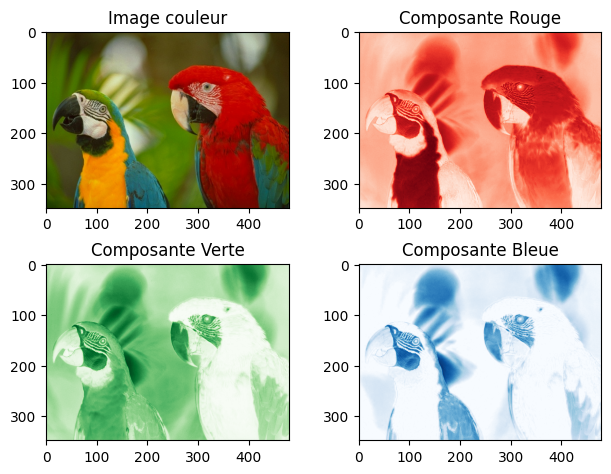

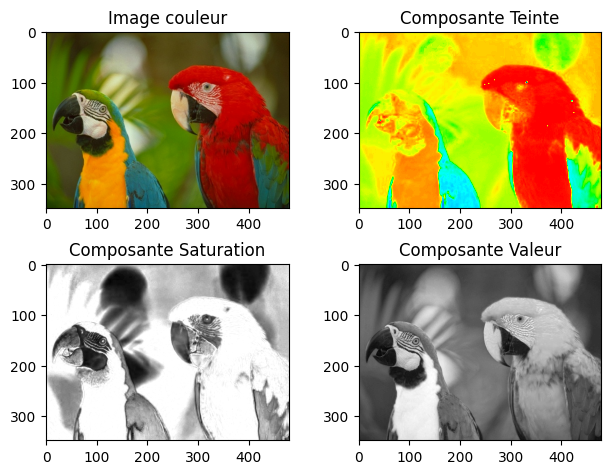

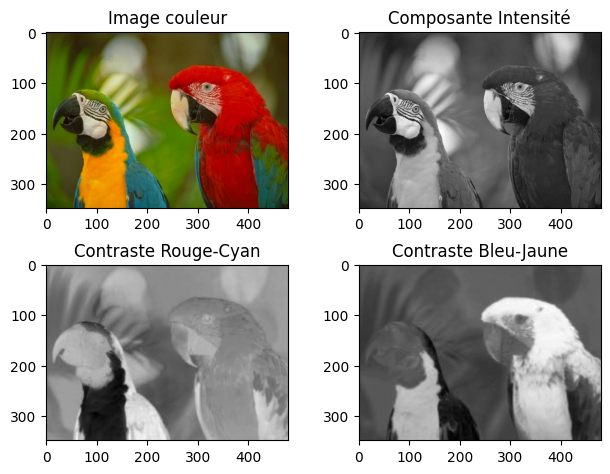

In [7]:
#Affichage des composantes RGB
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(r,cmap = 'Reds')
plt.title('Composante Rouge')
plt.subplot(223)
plt.imshow(g,cmap = 'Greens')
plt.title('Composante Verte')
plt.subplot(224)
plt.imshow(b,cmap = 'Blues')
plt.title('Composante Bleue')
plt.tight_layout()
plt.show()

#Affichage des composantes HSV
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(h,cmap = 'hsv')
plt.title('Composante Teinte')
plt.subplot(223)
plt.imshow(s,cmap = 'gray')
plt.title('Composante Saturation')
plt.subplot(224)
plt.imshow(v,cmap = 'gray')
plt.title('Composante Valeur')
plt.tight_layout()
plt.show()

#Affichage des composantes YUV
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(y,cmap = 'gray')
plt.title('Composante Intensité')
plt.subplot(223)
plt.imshow(cr,cmap = 'gray')
plt.title('Contraste Rouge-Cyan')
plt.subplot(224)
plt.imshow(cb,cmap = 'gray')
plt.title('Contraste Bleu-Jaune')
plt.tight_layout()
plt.show()

## Principes de la classification bayésienne

Dans le cadre de l'aprentissage bayésienne, on peut choisir parmi deux critères pour optimiser l'estimation :

### Critère du Maximum de Vraisemblance (ML)

Dans ce cas, on essaie de maximiser la fonction de vraisemblance d'une distribution présumée. Cette fonction est définie comme, étant donné les données d'observation $X$ et le paramètre de la distribution $c$ :

$$ c \rightarrow L_n(c;x_1,...,x_n) = P(X|c) = \prod_{i=1}^{n}f_c(x_i) $$

Vu que les observations sont indépendentes et ont comme distribution $f_c(x)$. Ainsi, l'objectif est :

$$ c^{*}(X) = \arg\max_{c} P(X|c) $$

### Critère du Maximum _a posteriori_ (MAP)

Dans ce cas, on associe au paramètre $c$ une distribution _a priori_ $P(c)$. Ainsi, on en obtient, à partir de la Loi de Bayes, sa distribution _a posteriori_ :

$$ P(c|X) = \frac{P(X|c)P(c)}{P(X)} $$

On cherche alors le paramètre $c$ le plus probable après les observations $X$. Ainsi, l'objectif est :

$$ c^{*}(X) = \arg\max_{c} P(c|X) = \arg\max_{c} P(X|c)P(c) = \arg\max_{c} \log P(X|c) + \log P(c) $$

Car la fonction logarithme est monotone. Ainsi, ce qui distingue le ML du MAP est le poids donné à la loi _a priori_. Ainsi, ces fonctions doivent être prises en compte par le code et soit choisies de façon arbitraire soit de façon a minimiser l'information _a priori_.